In [1]:
import numpy as np

# 평균 제곱 오차(Mean Squared Error, MSE)

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [3]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])
mean_squared_error(y, t)

0.09750000000000003

In [4]:
y = np.array([0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0])
mean_squared_error(y, t)

0.5975

# 교차 엔트로피 오차(Cross Entropy Error, CEE)

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])
cross_entropy_error(y, t)

0.510825457099338

In [7]:
y = np.array([0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0])
cross_entropy_error(y, t)

2.302584092994546

# 미니배치 학습

In [8]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [9]:
(x_train, t_train), _ = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [12]:
test = np.array([1, 2, 3, 4, 5, 6])
print(test)
print(test.ndim)
test = test.reshape(1, 6)
print(test)
test.size

[1 2 3 4 5 6]
1
[[1 2 3 4 5 6]]


6

# 미분

## 수치 미분(Numerical differentiation)

In [13]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def f(x):
    return 0.01*x**2 + 0.1*x

numerical_diff(f, 5)

0.1999999999990898

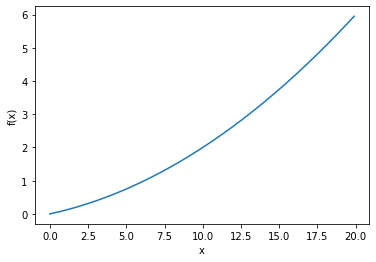

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 20, 0.1)
y = f(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

## 편미분

In [15]:
def f2(x):
    return np.sum(x**2)

In [16]:
def f2_tmp1(x):
    return f2(np.array([x, 4]))

numerical_diff(f2_tmp1, 3)

6.00000000000378

In [17]:
def f2_tmp2(x):
    return f2(np.array([3, x]))

numerical_diff(f2_tmp2, 4)

7.999999999999119

# 기울기

In [49]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i in range(x.size):
        tmp_val = x[i]
        x[i] = tmp_val + h
        fxh1 = f(x)
        x[i] = tmp_val - h
        fxh2 = f(x)
        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp_val
    return grad
numerical_gradient(f2, np.array([3., 4.]))

array([6., 8.])

## 경사법(경사 하강법)

In [67]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for _ in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        plt.plot(x)
    plt.show()
    return x

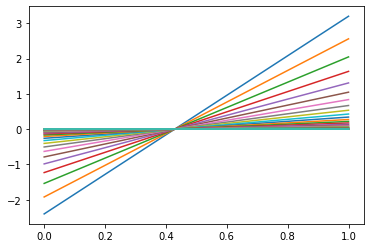

array([-6.11110793e-10,  8.14814391e-10])

In [68]:
init_x = np.array([-3., 4.])
gradient_descent(f2, init_x, 0.1, 100)